# Predicciones de Riesgos de Accidentes de Tránsido con Machine Learning

## Objetivo General
Aplicar las técnicas de Machine Learning para realizar predicciones sobre el fenómeno de siniestros de tránsito utilizando el conjunto de datos de la AMT de Ecuador con fecha de corte 2024-x-x.
## Objetivo Específico:
- Utilizar aprendizaje supervisado que permita predecir, dados unas condiciones de entrada, el nivel de gravedad del accidente. Para esto se considera la **Pirámide de Bird**, la cual se adapta según la relación de fallecidos y lesionados en el siniestro.
- Utilizar aprendizaje supervisado para predecir la cantidad de lesionados y fallecidos según condiciones de entrada. Para esto se puede partir del dataset original.
- Utilizar aprendizaje supervisado para obtener grupos de siniestralidad en función de las características del accidente

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
dataset_path = os.path.join(os.getcwd(), 'data', 'dataset_with_weather.csv')
dataset = pd.read_csv(dataset_path, parse_dates=['FECHA_DT'])
dataset.shape

C:\Users\entea\AppData\Local\Temp\ipykernel_1312\3780251289.py:5: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv(dataset_path, parse_dates=['FECHA_DT'])


(164992, 76)

In [10]:
pd.set_option('display.max_columns', None)
pd.options.display.max_rows = None

In [22]:
dataset.sample(5)

,Unnamed: 0,NUMERO,ANIO,SINIESTROS,LESIONADOS,FALLECIDOS,ENTE_DE_CONTROL,LATITUD_Y,LONGITUD_X,DPA_1,PROVINCIA,DPA_2,CANTON,DPA_3,PARROQUIA,DIRECCION,ZONA_PLANIFICACION,ZONA,ID_DE_LA_VIA,NOMBRE_DE_LA_VIA,UBICACION_DE_LA_VIA,JERARQUIA_DE_LA_VIA,FECHA,HORA,PERIODO_1,PERIODO_2,DIA_1,DIA_2,MES_1,MES_2,FERIADO,CODIGO_CAUSA,CAUSA_PROBABLE,TIPO_DE_SINIESTRO,TIPO_DE_VEHICULO_1,SERVICIO_1,AUTOMOVIL,BICICLETA,BUS,CAMION,CAMIONETA,EMERGENCIAS,ESPECIAL,FURGONETA,MOTOCICLETA,NO_IDENTIFICADO,SCOOTER_ELECTRICO,TRICIMOTO,VEHICULO_DEPORTIVO_UTILITARIO,SUMA_DE_VEHICULOS,TIPO_ID_1,EDAD_1,SEXO_1,CONDICION_1,PARTICIPANTE_1,CASCO_1,CINTURON_1,DPA_PROV,DPA_CANT,DPA_PARR,GRUPO ETARIO,FECHA_STR,FECHA_STR2,FECHA_DT,FECHA_DT2,FECHA_DT_UTC_seconds,weather_data,CLIMA_TEMP,CLIMA_DWPT,CLIMA_RHUM,CLIMA_PRCP,CLIMA_WDIR,CLIMA_WSPD,CLIMA_PRES,CLIMA_COCO,CLIMA_CONDICION,TASA_LETALIDAD,CATEGORIA_LETALIDAD
2908,2908,11661,2017,ATM11661052017,1,0,AGENCIA DE TRANSITO Y MOVILIDAD DE GUAYAQUIL -...,-2.122517,-79.930975,9,GUAYAS,901,GUAYAQUIL,90150,GUAYAQUIL,AV. DAULE Y CALLE 19H NO,ZONA 8,URBANA,ND,ND,ND,ND,"domingo, 28 de mayo de 2017",14:25:00,DE 14H00 A 14H59,14.0,DOMINGO,7.0,MAYO,5.0,1,C19,REALIZAR CAMBIO BRUSCO O INDEBIDO DE CARRIL.,CHOQUE_LATERAL,AUTOMOVIL,PARTICULAR,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,CEDULA,-1.0,HOMBRE,LESIONADO,PASAJERO,0,0,9,901,90150,NO IDENTIFICADO,"domingo, 28 de mayo de 2017 14:25:00",2017/05/28 14:25:00,2017-05-28 14:25:00,2017-05-28 14:25:00-05:00,1.496000e+09,"{'temp': 27.0, 'dwpt': 22.0, 'rhum': 74.0, 'pr...",27.000000,22.000000,74.000000,0.174072,200.000000,7.600000,1010.847675,3,Nublado,0.000000,LEVE
131844,131869,83849,2020,CTE04757032020,1,0,COMISION DE TRANSITO DEL ECUADOR - CTE,-2.227886,-79.668586,9,GUAYAS,920,SAN JACINTO DE YAGUACHI,92055,YAGUACHI VIEJO,YAGUACHI TRONCAL DE LA COSTA E40 EN SENTIDO VI...,ZONA 5,RURAL,181,DURAN - BOLICHE,E40,ARTERIAL,"martes, 17 de marzo de 2020",21:30:00,DE 21H00 A 21H59,21.0,MARTES,2.0,MARZO,3.0,0,C14,CONDUCIR DESATENTO A LAS CONDICIONES DE TRANSI...,ARROLLAMIENTOS,CAMION,PARTICULAR,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,CEDULA,42.0,HOMBRE,LESIONADO,CONDUCTOR_PRESENTE,0,0,9,920,92055,DE 40 A 49 AÑOS,"martes, 17 de marzo de 2020 21:30:00",2020/03/17 21:30:00,2020-03-17 21:30:00,2020-03-17 21:30:00-05:00,1.584499e+09,"{'temp': 31.0, 'dwpt': 23.9, 'rhum': 66.0, 'pr...",31.000000,23.900000,66.000000,0.174072,50.000000,7.600000,1008.000000,2,Buen tiempo,0.000000,LEVE
112734,112734,124874,2022,PNE00053052022,0,1,POLICIA NACIONAL DEL ECUADOR,-0.766131,-78.612842,5,COTOPAXI,501,LATACUNGA,50161,TANICUCHI,PANAMERICANA NORTE - KM 328-150,ZONA 3,RURAL,ND,ND,ND,ND,"sábado, 7 de mayo de 2022",22:45:00,DE 22H00 A 22H59,22.0,SABADO,6.0,MAYO,5.0,0,C14,CONDUCIR DESATENTO A LAS CONDICIONES DE TRANSI...,ARROLLAMIENTOS,NO IDENTIFICADO,PARTICULAR,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,CEDULA,26.0,HOMBRE,FALLECIDO,PEATON,0,1,5,501,50161,DE 20 A 29 AÑOS,"sábado, 7 de mayo de 2022 22:45:00",2022/05/7 22:45:00,2022-05-07 22:45:00,2022-05-07 22:45:00-05:00,1.651982e+09,"{'temp': 14.0, 'dwpt': 8.0, 'rhum': 67.0, 'prc...",14.000000,8.000000,67.000000,0.300000,170.000000,20.500000,1029.000000,6,Niebla congelante,1.000000,FATAL
70798,70798,93866,2020,MSD14774112020,1,0,EMPRESA PUBLICA MUNICIPAL DE TRANSPORTE SANTO ...,-0.261132,-79.153382,23,SANTO DOMINGO DE LOS TSACHILAS,2301,SANTO DOMINGO,230150,SANTO DOMINGO DE LOS COLORADOS,CALLE BAHIA DE CARAQUEZ Y CALLE JUNIN,ZONA 4,URBANA,ND,ND,ND,ND,"jueves, 26 de noviembre de 2020",07:00:00,DE 07H00 A 07H59,7.0,JUEVES,4.0,NOVIEMBRE,11.0,0,C25,NO CEDER EL DERECHO DE VIA O PREFERENCIA DE PA...,CHOQUE_LATERAL,MOTOCICLETA,PARTICULAR,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2.0,CEDULA,18.0,HOMBRE,LESIONADO,CONDUCTOR_PRESENTE,0,0,23,2301,230150,DE 10 A 19 AÑOS,"jueves, 26 de noviembre de 2020 07:00:00",2020/11/26 07:00:00,2020-11-26 07:00:00,2020-11-26 07:00:00-05:00,1.606392e+09,"{'temp': nan, 'dwpt': nan, 'rhum': nan, 'prc

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164992 entries, 0 to 164991
Data columns (total 76 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   Unnamed: 0                     164992 non-null  int64         
 1   NUMERO                         164992 non-null  int64         
 2   ANIO                           164992 non-null  int64         
 3   SINIESTROS                     164992 non-null  object        
 4   LESIONADOS                     164992 non-null  int64         
 5   FALLECIDOS                     164992 non-null  int64         
 6   ENTE_DE_CONTROL                164992 non-null  object        
 7   LATITUD_Y                      164992 non-null  float64       
 8   LONGITUD_X                     164992 non-null  float64       
 9   DPA_1                          164992 non-null  int64         
 10  PROVINCIA                      164992 non-null  object        
 11  

In [4]:
# dataset_cl1 = dataset.dropna()
# dataset[dataset.isna()].shape

## Valores únicos contenidos en el dataset

Se revisa cuál es el contenido de valores únicos en el dataset en el caso de que la columna sea de tipo object

In [29]:
for column in ['FERIADO', 'CODIGO_CAUSA', 'CAUSA_PROBABLE', 'TIPO_DE_SINIESTRO', 'TIPO_DE_VEHICULO_1','SERVICIO_1', 'PARTICIPANTE_1', 'CASCO_1', 'CINTURON_1', 'GRUPO ETARIO', 'SEXO_1', 'UBICACION_DE_LA_VIA', 'PERIODO_1', 'ZONA', 'DIA_1', 'MES_1', 'CONDICION_1']:
    if dataset[column].dtype == "object":
        print(f"{column} tiene {len(set(dataset[column]))} valores únicos y {dataset[column].isna().sum()} valores nulos:\n{set(dataset[column])}")

CODIGO_CAUSA tiene 27 valores únicos y 0 valores nulos:
{'C26', 'C04', 'C08', 'C02', 'C21', 'C09', 'C22', 'C06', 'C16', 'C10', 'C15', 'C24', 'C27', 'C28', 'C19', 'C20', 'C05', 'C25', 'C18', 'C07', 'C23', 'C11', 'C17', 'C12', 'C14', 'C03', 'C01'}
CAUSA_PROBABLE tiene 27 valores únicos y 0 valores nulos:
{'CONDICIONES AMBIENTALES Y/O ATMOSFERICAS (NIEBLA, NEBLINA, GRANIZO, LLUVIA).', 'NO CEDER EL DERECHO DE VIA O PREFERENCIA DE PASO A VEHICULOS.', 'DEJAR O RECOGER PASAJEROS EN LUGARES NO PERMITIDOS.', 'NO MANTENER LA DISTANCIA PRUDENCIAL CON RESPECTO AL VEHICULO QUE LE ANTECEDE.', 'NO RESPETAR LAS SEÑALES MANUALES DEL AGENTE DE TRANSITO.', 'MALAS CONDICIONES DE LA VIA Y/O CONFIGURACION. (ILUMINACION Y DISEÑO).', 'PRESENCIA DE AGENTES EXTERNOS EN LA VIA (AGUA, ACEITE, PIEDRA, LASTRE, ESCOMBROS, MADEROS, ETC.).', 'PEATON TRANSITA BAJO INFLUENCIA DE ALCOHOL, SUSTANCIAS ESTUPEFACIENTES O PSICOTROPICAS Y/O MEDICAMENTOS.', 'CASO FORTUITO O FUERZA MAYOR (EXPLOSION DE NEUMATICO NUEVO, DERRUMBE, 

<Axes: ylabel='TIPO_DE_SINIESTRO'>

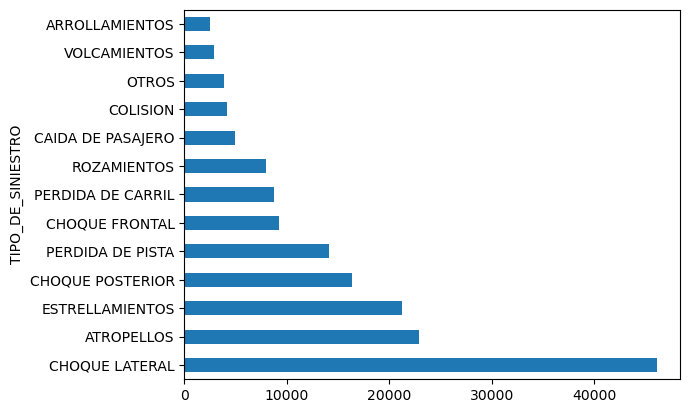

In [6]:
dataset.TIPO_DE_SINIESTRO.value_counts().plot.barh()

<Axes: ylabel='CONDICION_1'>

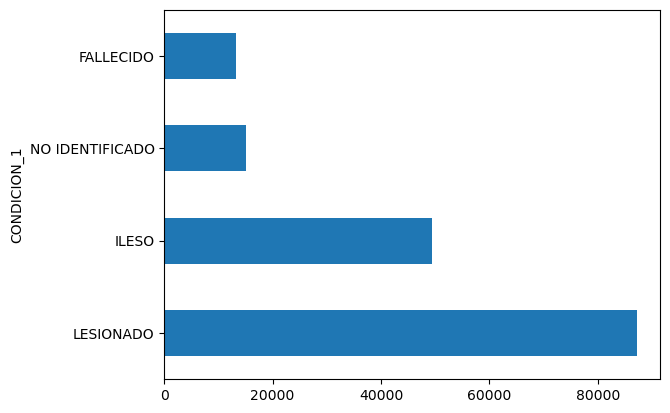

In [30]:
dataset.CONDICION_1.value_counts().plot.barh()

<Axes: ylabel='SERVICIO_1'>

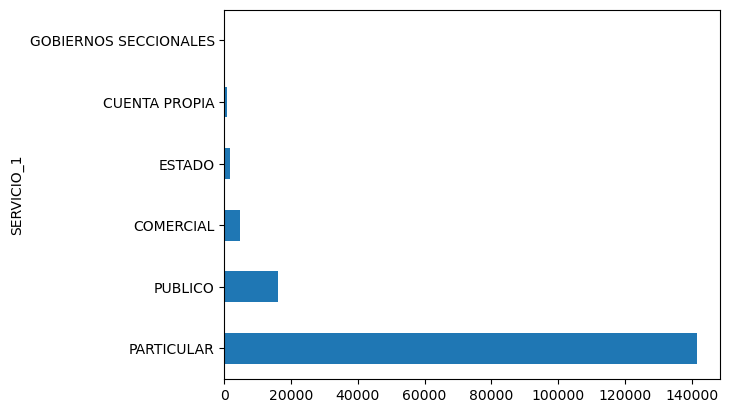

In [7]:
dataset.SERVICIO_1.value_counts().plot.barh()

Text(0.5, 1.0, 'NÚMERO DE FALLECIDOS SEGÚN PARTICIPANTE')

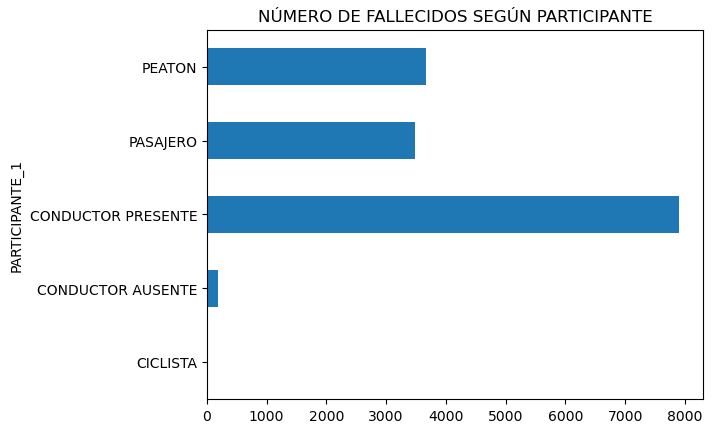

In [8]:
dataset.groupby(['PARTICIPANTE_1'])['FALLECIDOS'].sum().plot.barh()
plt.title('NÚMERO DE FALLECIDOS SEGÚN PARTICIPANTE')

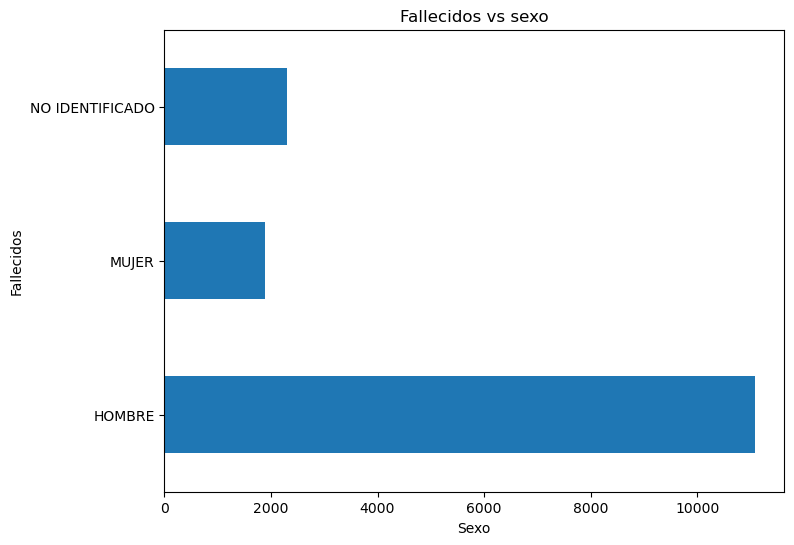

In [9]:
# Grouped bar plot
plt.figure(figsize=(8, 6))
# plt.bar(dataset['SEXO_1'], dataset['FALLECIDOS'], color=['blue', 'pink', 'orange'])
dataset.groupby('SEXO_1')['FALLECIDOS'].sum().plot.barh()
plt.xlabel('Sexo')
plt.ylabel('Fallecidos')
plt.title('Fallecidos vs sexo')
plt.show()

## Formateo de Categorías

Se procede a cambiar por valores numéricos representaciones categóricas:

- NO: 0
- SI: 1
- En la variable ZONA, Rural:0, Urbana:1
- Establecer un diccionario para las columnas código de causa y causa probable
- Remover espacios en blanco en columna TIPO DE SINIESTRO, PARTICIPANTE_1


In [10]:
dataset.FERIADO.value_counts()

FERIADO
NO    146200
SI     18792
Name: count, dtype: int64

In [25]:
dataset.FERIADO = dataset.FERIADO.replace({'NO':0, 'SI':1})
dataset.CASCO_1 = dataset.CASCO_1.replace({'NO':0, 'SI':1})
dataset.CINTURON_1 = dataset.CINTURON_1.replace({'NO':0, 'SI':1})
dataset.ZONA = dataset.ZONA.replace({'RURAL':0, 'URBANA':1})

C:\Users\entea\AppData\Local\Temp\ipykernel_1312\2288446578.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset.ZONA = dataset.ZONA.replace({'RURAL':0, 'URBANA':1})


In [12]:
dataset.FERIADO.value_counts()

FERIADO
0    146200
1     18792
Name: count, dtype: int64

In [13]:
dataset.TIPO_DE_SINIESTRO = dataset.TIPO_DE_SINIESTRO.str.replace(r'\s+', '_', regex=True)
dataset.PARTICIPANTE_1 = dataset.PARTICIPANTE_1.str.replace(r'\s+', '_', regex=True)

In [14]:
codigos_causas_dict = dict(zip(dataset.CODIGO_CAUSA, dataset.CAUSA_PROBABLE))
codigos_causas_dict.items()

dict_items([('C09', 'CONDUCIR VEHICULO SUPERANDO LOS LIMITES MAXIMOS DE VELOCIDAD.'), ('C12', 'NO GUARDAR LA DISTANCIA LATERAL MINIMA DE SEGURIDAD ENTRE VEHICULOS.'), ('C23', 'NO RESPETAR LAS SEÑALES REGLAMENTARIAS DE TRANSITO. (PARE, CEDA EL PASO, LUZ ROJA DEL SEMAFORO, ETC).'), ('C19', 'REALIZAR CAMBIO BRUSCO O INDEBIDO DE CARRIL.'), ('C06', 'CONDUCE BAJO LA INFLUENCIA DE ALCOHOL, SUSTANCIAS ESTUPEFACIENTES O PSICOTROPICAS Y/O MEDICAMENTOS.'), ('C24', 'NO RESPETAR LAS SEÑALES MANUALES DEL AGENTE DE TRANSITO.'), ('C07', 'PEATON TRANSITA BAJO INFLUENCIA DE ALCOHOL, SUSTANCIAS ESTUPEFACIENTES O PSICOTROPICAS Y/O MEDICAMENTOS.'), ('C18', 'CONDUCIR EN SENTIDO CONTRARIO A LA VIA NORMAL DE CIRCULACION.'), ('C27', 'PEATON QUE CRUZA LA CALZADA SIN RESPETAR LA SEÑALIZACION EXISTENTE (SEMAFOROS O SEÑALES MANUALES).'), ('C11', 'NO MANTENER LA DISTANCIA PRUDENCIAL CON RESPECTO AL VEHICULO QUE LE ANTECEDE.'), ('C17', 'BAJARSE O SUBIRSE DE VEHICULOS EN MOVIMIENTO SIN TOMAR LAS PRECAUCIONES DEBIDAS.

In [15]:
# dataset_cl1['GRUPO ETARIO'].value_counts()

In [16]:
# dataset_cl1.SEXO_1.value_counts()


## Indicador de Riesgo basado en Pirámide de Bird
La Pirámide de Bird, también conocida como la teoría de la pirámide de accidentalidad, es una representación gráfica que indica que tras un accidente fatal subyacen alertas previas. Fue desarrollada por Frank Bird en 1969 y se basa en el estudio de 1,750,000 personas. Esta teoría es relevante para evaluar la gravedad de los accidentes de tránsito y su prevención
Los niveles que define esta pirámide son:
- Accidentes Fatales: mortales o de incapacidad permanente
- Accidentes Graves: pérdida de tiempo con o sin daño material
- Accidentes Leves: daños materiales con o sin lesión
- Casos de riesgo: situación en la que no se produce lesión ni daño

Más información disponible en [piramideBird](https://es.wikipedia.org/wiki/Pir%C3%A1mide_de_Bird)

Para este caso se define un indicador relacionando la cantidad de fallecidos y la cantidad de lesionados:

$\gamma=\frac{fallecidos}{lesionados+fallecidos}$

Ahora bien este parámetro ha de ser escalado convenientemente a fin de poder determinar una clasificación de la gravedad del accidente de tránsito

In [17]:
def tasa_fallecidos_lesionados(num_fallecidos, num_lesionados):
    if num_fallecidos!=0 or num_lesionados!=0:
        return num_fallecidos/(num_lesionados+num_fallecidos)
    else:
        return 0

dataset['TASA_LETALIDAD'] = dataset.apply(lambda x: tasa_fallecidos_lesionados(x.FALLECIDOS, x.LESIONADOS), axis=1)

In [18]:
dataset[['FALLECIDOS', 'LESIONADOS', 'TASA_LETALIDAD']].sample(10)

,FALLECIDOS,LESIONADOS,TASA_LETALIDAD
140700,0,2,0.0
56676,0,0,0.0
151042,0,0,0.0
121084,0,2,0.0
32529,0,1,0.0
5215,0,1,0.0
85699,0,1,0.0
56647,0,0,0.0
95131,0,0,0.0
53172,0,2,0.0


Se puede ahora revisar la estadística relacionada al indicador de tasa de letalidad

In [19]:
dataset.TASA_LETALIDAD.describe()

count    164992.000000
mean          0.069680
std           0.244371
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: TASA_LETALIDAD, dtype: float64

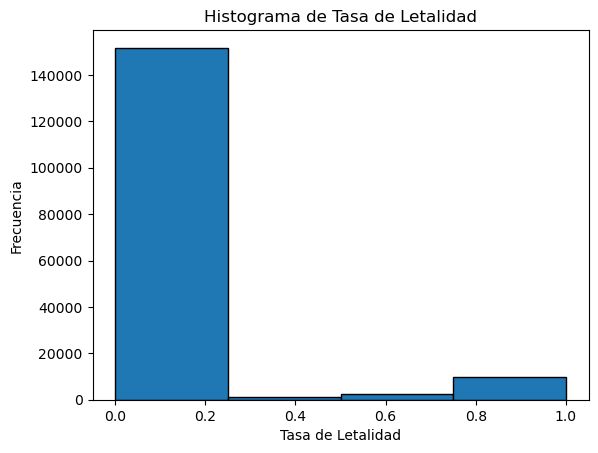

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(dataset.TASA_LETALIDAD, bins=4, edgecolor="black")
plt.xlabel("Tasa de Letalidad")
plt.ylabel("Frecuencia")
plt.title("Histograma de Tasa de Letalidad")
plt.show()

## Etiquetas de Letalidad del Accidente
A partir del gráfico se puede deducir las siguientes escalas de clasificación
- Fatal $\gamma \geq 0.8$
- Grave $ 0.5 \leq \gamma \le 0.8$
- Leve $\gamma \le 0.5$

Con estas consideraciones se generara una columna con las etiquetas a predecir

In [21]:
from tqdm import tqdm

def create_label(tasa):
    if tasa >= 0.8:
        return "FATAL"
    elif  0.5 <= tasa < 0.8:
        return "GRAVE"
    else:
        return "LEVE"
tqdm.pandas()
dataset['CATEGORIA_LETALIDAD'] = dataset['TASA_LETALIDAD'].progress_apply(lambda x: create_label(x))


100%|██████████| 164992/164992 [00:00<00:00, 510388.52it/s]


## Generación de y Selección de Variables
Para resolver un problema con aprendizaje automático, éste debe ser modelado a través de componentes vectoriales representativas o *feature vectors* $\mathbf{X} = \{x_1, x_2, \dots, x_m\}$ de tal manera que la variable a predecir $Y$ sea una fución $g$ tal que $g$ aproxima a la función real $f$ y  $Y = f(\mathbf{X})$.

Los modelos de aprendizaje automático permiten, a través de algoritmos de optimización, obtener de un conjunto de hipótesis $\mathcal{H}$ un modelo que aproxime la función real que relaciona a las variables de entrada con la de salida.

De aquí que la representación de $\mathbf{X}$ sea esencialmente numérica y se deba seleccionar las variables que se presuman afectan la predicción de la categoría. 

Se retiran del dataset los NO IDENTIFICADOS de la variable CONDICION_1

In [40]:
cols2consider = ['LESIONADOS', 'FALLECIDOS', 'LATITUD_Y', 'LONGITUD_X', 'ZONA', 'FERIADO', 'PERIODO_1', 'DIA_1', 'CODIGO_CAUSA', 'TIPO_DE_SINIESTRO', 'AUTOMOVIL', 'BICICLETA', 'CAMIONETA', 'EMERGENCIAS', 'ESPECIAL', 'FURGONETA', 'MOTOCICLETA', 'NO_IDENTIFICADO', 'SCOOTER_ELECTRICO', 'TRICIMOTO', 'VEHICULO_DEPORTIVO_UTILITARIO', 'SUMA_DE_VEHICULOS', 'CONDICION_1', 'CASCO_1', 'CINTURON_1', 'CLIMA_TEMP', 'CLIMA_DWPT', 'CLIMA_RHUM', 'CLIMA_PRCP', 'CLIMA_WDIR', 'CLIMA_WSPD', 'CLIMA_PRES', 'CLIMA_CONDICION', 'TASA_LETALIDAD', 'CATEGORIA_LETALIDAD']
dataset1 = dataset[dataset['ANIO']!=2024].copy()
dataset1 = dataset1[cols2consider]
dataset1 = dataset1[dataset1.CONDICION_1!="NO IDENTIFICADO"]
dataset1.shape

(146085, 35)

In [41]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146085 entries, 0 to 164987
Data columns (total 35 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   LESIONADOS                     146085 non-null  int64  
 1   FALLECIDOS                     146085 non-null  int64  
 2   LATITUD_Y                      146085 non-null  float64
 3   LONGITUD_X                     146085 non-null  float64
 4   ZONA                           146085 non-null  int64  
 5   FERIADO                        146085 non-null  int64  
 6   PERIODO_1                      146085 non-null  object 
 7   DIA_1                          146085 non-null  object 
 8   CODIGO_CAUSA                   146085 non-null  object 
 9   TIPO_DE_SINIESTRO              146085 non-null  object 
 10  AUTOMOVIL                      146085 non-null  float64
 11  BICICLETA                      146085 non-null  float64
 12  CAMIONETA                      1460

## One-Hot 

Se procede a obtener el one-hot encoding de las variables de intéres a fin de que el tensor de entrada $\mathbf{X}$ caracterice numéricamente el problema. Este dataset ha de ser guardado ya que puede usarse para derivar variables de regresión como el número de lesionados y el número de fallecidos.



In [48]:
COLUMNS2USE = ['PERIODO_1', 'DIA_1', 'CODIGO_CAUSA', 'TIPO_DE_SINIESTRO', 'CONDICION_1', 'CLIMA_CONDICION']
dataset2 = pd.get_dummies(dataset1, columns=COLUMNS2USE,
                          prefix=COLUMNS2USE,
                          dtype=float)
dataset2.shape, dataset1.shape

((146085, 117), (146085, 35))

In [49]:
dataset2.sample(5)

,LESIONADOS,FALLECIDOS,LATITUD_Y,LONGITUD_X,ZONA,FERIADO,AUTOMOVIL,BICICLETA,CAMIONETA,EMERGENCIAS,ESPECIAL,FURGONETA,MOTOCICLETA,NO_IDENTIFICADO,SCOOTER_ELECTRICO,TRICIMOTO,VEHICULO_DEPORTIVO_UTILITARIO,SUMA_DE_VEHICULOS,CASCO_1,CINTURON_1,CLIMA_TEMP,CLIMA_DWPT,CLIMA_RHUM,CLIMA_PRCP,CLIMA_WDIR,CLIMA_WSPD,CLIMA_PRES,TASA_LETALIDAD,CATEGORIA_LETALIDAD,PERIODO_1_DE 00H00 A 00H59,PERIODO_1_DE 01H00 A 01H59,PERIODO_1_DE 02H00 A 02H59,PERIODO_1_DE 03H00 A 03H59,PERIODO_1_DE 04H00 A 04H59,PERIODO_1_DE 05H00 A 05H59,PERIODO_1_DE 06H00 A 06H59,PERIODO_1_DE 07H00 A 07H59,PERIODO_1_DE 08H00 A 08H59,PERIODO_1_DE 09H00 A 09H59,PERIODO_1_DE 10H00 A 10H59,PERIODO_1_DE 11H00 A 11H59,PERIODO_1_DE 12H00 A 12H59,PERIODO_1_DE 13H00 A 13H59,PERIODO_1_DE 14H00 A 14H59,PERIODO_1_DE 15H00 A 15H59,PERIODO_1_DE 16H00 A 16H59,PERIODO_1_DE 17H00 A 17H59,PERIODO_1_DE 18H00 A 18H59,PERIODO_1_DE 19H00 A 19H59,PERIODO_1_DE 20H00 A 20H59,PERIODO_1_DE 21H00 A 21H59,PERIODO_1_DE 22H00 A 22H59,PERIODO_1_DE 23H00 A 23H59,DIA_1_DOMINGO,DIA_1_JUEVES,DIA_1_LUNES,DIA_1_MARTES,DIA_1_MIERCOLES,DIA_1_SABADO,DIA_1_VIERNES,CODIGO_CAUSA_C01,CODIGO_CAUSA_C02,CODIGO_CAUSA_C03,CODIGO_CAUSA_C04,CODIGO_CAUSA_C05,CODIGO_CAUSA_C06,CODIGO_CAUSA_C07,CODIGO_CAUSA_C08,CODIGO_CAUSA_C09,CODIGO_CAUSA_C10,CODIGO_CAUSA_C11,CODIGO_CAUSA_C12,CODIGO_CAUSA_C14,CODIGO_CAUSA_C15,CODIGO_CAUSA_C16,CODIGO_CAUSA_C17,CODIGO_CAUSA_C18,CODIGO_CAUSA_C19,CODIGO_CAUSA_C20,CODIGO_CAUSA_C21,CODIGO_CAUSA_C22,CODIGO_CAUSA_C23,CODIGO_CAUSA_C24,CODIGO_CAUSA_C25,CODIGO_CAUSA_C26,CODIGO_CAUSA_C27,CODIGO_CAUSA_C28,TIPO_DE_SINIESTRO_ARROLLAMIENTOS,TIPO_DE_SINIESTRO_ATROPELLOS,TIPO_DE_SINIESTRO_CAIDA_DE_PASAJERO,TIPO_DE_SINIESTRO_CHOQUE_FRONTAL,TIPO_DE_SINIESTRO_CHOQUE_LATERAL,TIPO_DE_SINIESTRO_CHOQUE_POSTERIOR,TIPO_DE_SINIESTRO_COLISION,TIPO_DE_SINIESTRO_ESTRELLAMIENTOS,TIPO_DE_SINIESTRO_OTROS,TIPO_DE_SINIESTRO_PERDIDA_DE_CARRIL,TIPO_DE_SINIESTRO_PERDIDA_DE_PISTA,TIPO_DE_SINIESTRO_ROZAMIENTOS,TIPO_DE_SINIESTRO_VOLCAMIENTOS,CONDICION_1_FALLECIDO,CONDICION_1_ILESO,CONDICION_1_LESIONADO,CLIMA_CONDICION_Buen tiempo,CLIMA_CONDICION_Chubascos de lluvia,CLIMA_CONDICION_Chubascos de lluvia intensa,CLIMA_CONDICION_Cubierto,CLIMA_CONDICION_Despejado,CLIMA_CONDICION_Lluvia,CLIMA_CONDICION_Lluvia intensa,CLIMA_CONDICION_Lluvia ligera,CLIMA_CONDICION_Niebla,CLIMA_CONDICION_Niebla congelante,CLIMA_CONDICION_Nublado,CLIMA_CONDICION_Tormenta,CLIMA_CONDICION_Tormenta eléctrica,CLIMA_CONDICION_Tormenta eléctrica intensa
124100,0,0,-0.382689,-78.506351,1,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0,0,13.4,9.1,75.0,0.430800,81.0,7.4,1016.100000,0.0,LEVE,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75268,1,0,-1.855388,-79.979416,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,0,0,21.5,19.1,86.0,0.174072,71.0,13.0,1017.700000,0.0,LEVE,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
22818,1,0,-2.197156,-79.889038,1,0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0,0,25.0,24.0,94.0,0.174072,30.0,9.4,1010.847675,0.0,LEVE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
33029,1,0,-0.269101,-78.534101,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1

Salvando el Dataset para realizar los entrenamientos ulteriores

In [51]:
dataset2.to_csv(os.path.join(os.getcwd(), 'data', 'dataset_ant_ecu.csv'), index=False)

## Modelo de Clasificación de Letalidad

Para la obtención del modelo de clasificación de Letalidad, que determina tres categorías de acuerdo a la Pirámide de Bird, se requiere separar el dataset en dos juegos de datos $\textbf{X}$ y $Y$. Para este caso las categorías a predecir son las determinadas por la variable CATEGORIA_LETALIDAD

In [4]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
dataset_csv_path = os.path.join(os.getcwd(), 'data', 'dataset_ant_ecu.csv')
dataset_csv = pd.read_csv(dataset_csv_path)
dataset_csv.shape

(146085, 117)

Text(0.5, 1.0, 'Balance de Categorías')

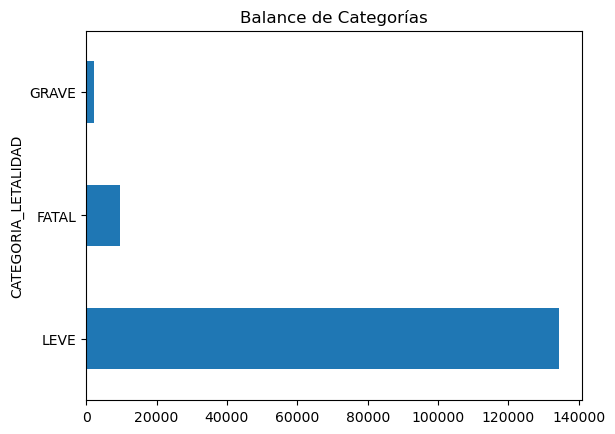

In [8]:
dataset_csv.CATEGORIA_LETALIDAD.value_counts().plot.barh()
plt.title("Balance de Categorías")

In [9]:
dataset_csv.CATEGORIA_LETALIDAD.value_counts()

CATEGORIA_LETALIDAD
LEVE     134224
FATAL      9551
GRAVE      2310
Name: count, dtype: int64

Los datos se encuentran no balanceados debido a esto es recomendable utilizar *Random Forest* y *Validación Cruzada*. El modelo de *Random Forest* puede mejorarse reaiizando un balanceo de las clases. El problema planteado de esta manera con las categorías presentadas no es un buen candidato para usar redes neuronales o Tensorflow. Para esos casos se podría utilizar técnicas para la generación sintética de datos pero esto se debe hacer sólo sobre el dataset de entrenamiento.

In [10]:
dataset_csv.describe()

,LESIONADOS,FALLECIDOS,LATITUD_Y,LONGITUD_X,ZONA,FERIADO,AUTOMOVIL,BICICLETA,CAMIONETA,EMERGENCIAS,...,CLIMA_CONDICION_Despejado,CLIMA_CONDICION_Lluvia,CLIMA_CONDICION_Lluvia intensa,CLIMA_CONDICION_Lluvia ligera,CLIMA_CONDICION_Niebla,CLIMA_CONDICION_Niebla congelante,CLIMA_CONDICION_Nublado,CLIMA_CONDICION_Tormenta,CLIMA_CONDICION_Tormenta eléctrica,CLIMA_CONDICION_Tormenta eléctrica intensa
count,146085.000000,146085.000000,146085.000000,146085.000000,146085.000000,146085.000000,146085.000000,146085.000000,146085.000000,146085.000000,...,146085.000000,146085.000000,146085.000000,146085.000000,146085.000000,146085.000000,146085.000000,146085.000000,146085.000000,146085.000000
mean,0.888846,0.100859,-1.481260,-79.331319,0.653010,0.111771,0.573385,0.016223,0.180135,0.000760,...,0.003833,0.017113,0.006996,0.025656,0.106746,0.053503,0.393880,0.000301,0.000945,0.000027
std,1.124414,0.369083,1.091501,0.784739,0.476014,0.315085,0.742120,0.128163,0.419262,0.027555,...,0.061796,0.129694,0.083349,0.158108,0.308791,0.225035,0.488611,0.017352,0.030721,0.005233
min,0.000000,0.000000,-4.966098,-90.960459,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,-2.197426,-79.905765,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,-1.734818,-79.463453,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,-0.281321,-78.552792,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,48.000000,22.000000,1.366128,-8.615899,1.000000,1.000000,9.000000,3.000000,7.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
list(dataset_csv.columns)

['LESIONADOS',
 'FALLECIDOS',
 'LATITUD_Y',
 'LONGITUD_X',
 'ZONA',
 'FERIADO',
 'AUTOMOVIL',
 'BICICLETA',
 'CAMIONETA',
 'EMERGENCIAS',
 'ESPECIAL',
 'FURGONETA',
 'MOTOCICLETA',
 'NO_IDENTIFICADO',
 'SCOOTER_ELECTRICO',
 'TRICIMOTO',
 'VEHICULO_DEPORTIVO_UTILITARIO',
 'SUMA_DE_VEHICULOS',
 'CASCO_1',
 'CINTURON_1',
 'CLIMA_TEMP',
 'CLIMA_DWPT',
 'CLIMA_RHUM',
 'CLIMA_PRCP',
 'CLIMA_WDIR',
 'CLIMA_WSPD',
 'CLIMA_PRES',
 'TASA_LETALIDAD',
 'CATEGORIA_LETALIDAD',
 'PERIODO_1_DE 00H00 A 00H59',
 'PERIODO_1_DE 01H00 A 01H59',
 'PERIODO_1_DE 02H00 A 02H59',
 'PERIODO_1_DE 03H00 A 03H59',
 'PERIODO_1_DE 04H00 A 04H59',
 'PERIODO_1_DE 05H00 A 05H59',
 'PERIODO_1_DE 06H00 A 06H59',
 'PERIODO_1_DE 07H00 A 07H59',
 'PERIODO_1_DE 08H00 A 08H59',
 'PERIODO_1_DE 09H00 A 09H59',
 'PERIODO_1_DE 10H00 A 10H59',
 'PERIODO_1_DE 11H00 A 11H59',
 'PERIODO_1_DE 12H00 A 12H59',
 'PERIODO_1_DE 13H00 A 13H59',
 'PERIODO_1_DE 14H00 A 14H59',
 'PERIODO_1_DE 15H00 A 15H59',
 'PERIODO_1_DE 16H00 A 16H59',
 'PER

Separación del dataset en $\mathbf{X}$ y $Y$

In [16]:
'CATEGORIA_LETALIDAD' in dataset_csv.columns

True

In [37]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
X = dataset_csv.drop(['CATEGORIA_LETALIDAD'], axis=1)
X = np.array(X)
Y = dataset_csv.CATEGORIA_LETALIDAD
le = LabelEncoder()
Y = le.fit_transform(Y)
Y = np.array(Y)


Las clases se codifican numéricamente

In [38]:
le.classes_, le.inverse_transform([0,1,2])

(array(['FATAL', 'GRAVE', 'LEVE'], dtype=object),
 array(['FATAL', 'GRAVE', 'LEVE'], dtype=object))

La variable objetivo debería colocarse como tipo One-Hot. Sin embargo, debido a que Stratified K fold espera un array de enteros representando las clases, es suficiente usar $Y$

In [48]:
# from sklearn.preprocessing import OneHotEncoder
# encoder = OneHotEncoder(handle_unknown='ignore')
# Y_hot = encoder.fit_transform(Y.reshape(-1,1)).toarray()

In [49]:
# encoder.categories_, encoder.inverse_transform([[0,0,1],[0,1,0],[1,0,0]])

Pero $\mathbf{X}$ ha de ser escalado y normalizado para ser utlizado sobre todo cuando el modelo a utilizar es de tipo red neuronal o basado en gradiente descendente. En este caso al usar Random Forest no hace falta realizar el escalado y normalizado, de acuerdo a Sebastian Rashka Python Machine Learning 2015. También no es necesario separar en sets de entrenamiento y testeo por cuanto existe un considerable desbalance en las clases estudiadas. Por esta razón se recurre a *cross fold validation*. 

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=20, test_size=0.3, shuffle=True)
X_train.shape, X_test.shape

((102259, 116), (43826, 116))

In [59]:
np.unique(y_test, return_counts=True)

(array([0, 1, 2]), array([ 2863,   678, 40285], dtype=int64))

In [72]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier

# parametros del cross validation
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=1)
# inicializar best_model, best_score
best_model = None
best_score = 0
all_scores = []
# validacion cruzada

for train_idx, test_idx in cv.split(X_train, y_train):
    X_fold_train, X_fold_test = X_train[train_idx], X_train[test_idx]
    y_fold_train, y_fold_test = y_train[train_idx], y_train[test_idx]
    # entrenar el modelo
    model = RandomForestClassifier(n_estimators=100, class_weight='balanced', verbose=0)
    model.fit(X_fold_train, y_fold_train)
    # evaluar el modelo
    #  score = cross_val_score(model, X_fold_train, y_fold_train, cv=cv, scoring='accuracy').mean()
    score = model.score(X_fold_test, y_fold_test)
    print(f"score: {score}")
    all_scores.append(score)
    if score > best_score:
        best_score=score
        best_model = model

score: 0.9999511050264033
score: 0.9999511050264033
score: 0.9998533150792098
score: 0.9999511050264033
score: 1.0
score: 0.9999022100528066
score: 0.9999511050264033
score: 0.9999511050264033
score: 0.9999022100528066
score: 0.999951102635568


In [74]:
print('Mean Accuracy: %.3f (%.3f)' % (np.mean(all_scores), np.std(all_scores)))

Mean Accuracy: 1.000 (0.000)


## Evaluación modelo de clasificación

Para evaluar elmodelo de clasificación se puede utilizar algunas métricas como las que generalmente presenta el reporte de clasificación. No obstante para esto hemos de calcular sobre el dataset de testeo las predicciones $\hat{y}$

In [81]:
from sklearn.metrics import classification_report
y_pred = best_model.predict(X_test)
print(classification_report(y_true=y_test, y_pred=y_pred, target_names=le.classes_))

              precision    recall  f1-score   support

       FATAL       1.00      1.00      1.00      2863
       GRAVE       1.00      1.00      1.00       678
        LEVE       1.00      1.00      1.00     40285

    accuracy                           1.00     43826
   macro avg       1.00      1.00      1.00     43826
weighted avg       1.00      1.00      1.00     43826



Verifiquemos el funcionamiento del modelo entrenado usando la Matriz de confusión

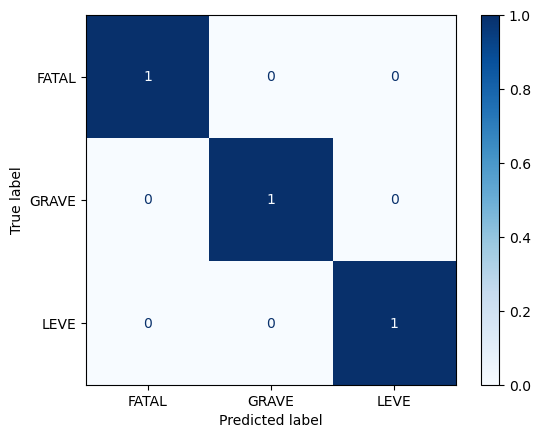

In [85]:
cmn = confusion_matrix(y_true=y_test, y_pred=y_pred, normalize='true')
disp = ConfusionMatrixDisplay(cmn, display_labels=le.classes_)
disp.plot(cmap="Blues")

## Conclusión

- Si bien el dataset presenta desbalance en las clases planteadas para predecir las categorías de letalidad, se puede decir que el problema contextualizado en 116 variables permite discriminar adecuadamente el suceso. 
- Se podría eliminar e intentar un nuevo entrenamiento obviando los valores de las posibles causas del siniestro, por cuanto estos datos pueden no existir para cuando se trata de dar una categoría al incidente.
- El uso de random forest en conjunto con cross validation permite realizar un entrenamiento efectivo a pesar del desbalance de las clases

## Referencias útiles:
- https://machinelearningmastery.com/multi-class-imbalanced-classification/
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RepeatedStratifiedKFold.html
- https://www.datacamp.com/tutorial/random-forests-classifier-python
- https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html
- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
- https://www.geeksforgeeks.org/stratified-k-fold-cross-validation/

## Regresión

De maera similar, dado que se dispone del número de lesionados y fallecidos en un siniestro se puede plantear el problema de predecir dichas cantidades en función del contexto del problema. Para esto se eliminará la columna de categorías, así como la tasa de letalidad que es una variable que relaciona ambas cantidades. Para este caso se utilizará una red neuronal y por tanto es necesario, a diferencia del caso anterior, realizar la normalización de los datos

In [2]:
dataset_csv.shape

(146085, 117)

In [5]:
Xr = dataset_csv.drop(['CATEGORIA_LETALIDAD', 'TASA_LETALIDAD', 'LESIONADOS', 'FALLECIDOS'], axis=1)
Xr = np.array(Xr)
Yr = dataset_csv[['LESIONADOS', 'FALLECIDOS']]
Yr = np.array(Yr)
Xr.shape, Yr.shape

((146085, 113), (146085, 2))

Realizando la separación en datos de entrenamiento y testeo

In [7]:
from sklearn.model_selection import train_test_split
Xr_train, Xr_test, yr_train, yr_test = train_test_split(Xr, Yr, test_size=0.3, shuffle=True, random_state=0)
Xr_train.shape, yr_test.shape

((102259, 113), (43826, 2))

In [8]:
y_lesionados_train = yr_train[:,0]
y_lesionados_test = yr_test[:,0]
y_fallecidos_train = yr_train[:,1]
y_fallecidos_test = yr_test[:,1]

Normalizando $\mathbf{Xr}$

In [9]:
Xr_train_norm = (Xr_train-Xr_train.mean())/Xr_train.std()
Xr_test_norm = (Xr_test-Xr_test.mean())/Xr_test.std()

In [10]:
Xr.shape, Xr_train.shape

((146085, 113), (102259, 113))

## Definición del Modelo
Se determina un modelo de varias capas profundas para predecir el número de lesionados y fallecidos

In [11]:
import tensorflow as tf
# layers
input_layer = tf.keras.layers.Input(shape=(Xr_train.shape[1]))
dense_layer_1 = tf.keras.layers.Dense(units = 128, activation = "relu")(input_layer) 
dense_layer_2 = tf.keras.layers.Dense(units = 128, activation = "relu")(dense_layer_1)
dense_layer_3 = tf.keras.layers.Dense(units = 64, activation = "relu")(dense_layer_2)

# Y_lesionados output
y_lesionados_output = tf.keras.layers.Dense(units = 1, activation = "linear", name = "y_lesionados")(dense_layer_2)

# Y2 output
y_fallecidos_output = tf.keras.layers.Dense(units = 1, activation = "linear", name = "y_fallecidos")(dense_layer_3)
# declaracion del modelo
regression_model = tf.keras.Model(inputs = input_layer, outputs = [y_lesionados_output, y_fallecidos_output])

optimizer = tf.keras.optimizers.RMSprop(learning_rate=1e-3)

regression_model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 113)]        0           []                               
                                                                                                  
 dense (Dense)                  (None, 128)          14592       ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 128)          16512       ['dense[0][0]']                  
                                                                                                  
 dense_2 (Dense)                (None, 64)           8256        ['dense_1[0][0]']                
                                                                                              

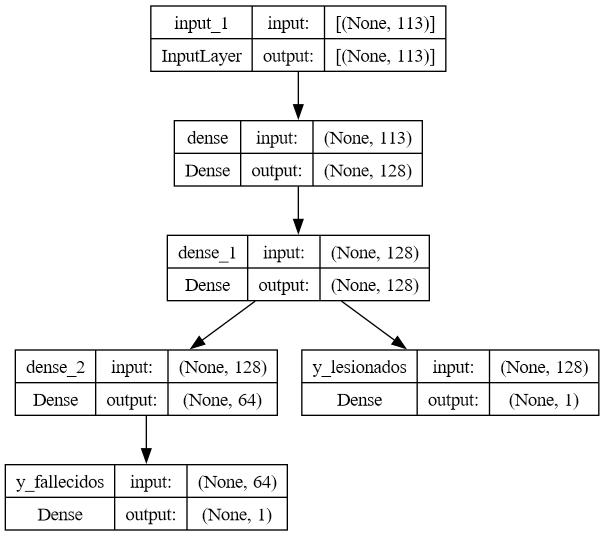

In [12]:
from tensorflow.keras.utils import plot_model
plot_model(regression_model, show_shapes=True)

In [13]:
regression_model.compile(optimizer = optimizer,
                         loss = {'y_lesionados':'mse', 'y_fallecidos':'mse'},
                         metrics = {
                             'y_lesionados':tf.keras.metrics.RootMeanSquaredError(),
                             'y_fallecidos':tf.keras.metrics.RootMeanSquaredError(),
                             }
                        )

In [30]:
from tensorflow.keras.callbacks import EarlyStopping
earlystopping = EarlyStopping(
    # monitor='val_loss',
    monitor='val_y_fallecidos_root_mean_squared_error',
    patience=5, 
    restore_best_weights=True)
history = regression_model.fit(Xr_train_norm, (y_lesionados_train, y_fallecidos_train), epochs = 2000, batch_size = 64, callbacks=[earlystopping],
                               validation_data = (Xr_test_norm, (y_lesionados_test, y_fallecidos_test)), verbose = 1)

Epoch 1/2000
1598/1598 [==============================] - 15s 9ms/step - loss: 1.0448 - y_lesionados_loss: 0.9461 - y_fallecidos_loss: 0.0987 - y_lesionados_root_mean_squared_error: 0.9727 - y_fallecidos_root_mean_squared_error: 0.3142 - val_loss: 0.8618 - val_y_lesionados_loss: 0.7839 - val_y_fallecidos_loss: 0.0778 - val_y_lesionados_root_mean_squared_error: 0.8854 - val_y_fallecidos_root_mean_squared_error: 0.2790
Epoch 2/2000
1598/1598 [==============================] - 15s 9ms/step - loss: 1.0184 - y_lesionados_loss: 0.9290 - y_fallecidos_loss: 0.0894 - y_lesionados_root_mean_squared_error: 0.9638 - y_fallecidos_root_mean_squared_error: 0.2991 - val_loss: 0.8115 - val_y_lesionados_loss: 0.7713 - val_y_fallecidos_loss: 0.0402 - val_y_lesionados_root_mean_squared_error: 0.8782 - val_y_fallecidos_root_mean_squared_error: 0.2005
Epoch 3/2000
1598/1598 [==============================] - 15s 10ms/step - loss: 1.0224 - y_lesionados_loss: 0.9329 - y_fallecidos_loss: 0.0895 - y_lesionados_

In [19]:
history.history.keys()

dict_keys(['loss', 'y_lesionados_loss', 'y_fallecidos_loss', 'y_lesionados_root_mean_squared_error', 'y_fallecidos_root_mean_squared_error', 'val_loss', 'val_y_lesionados_loss', 'val_y_fallecidos_loss', 'val_y_lesionados_root_mean_squared_error', 'val_y_fallecidos_root_mean_squared_error'])

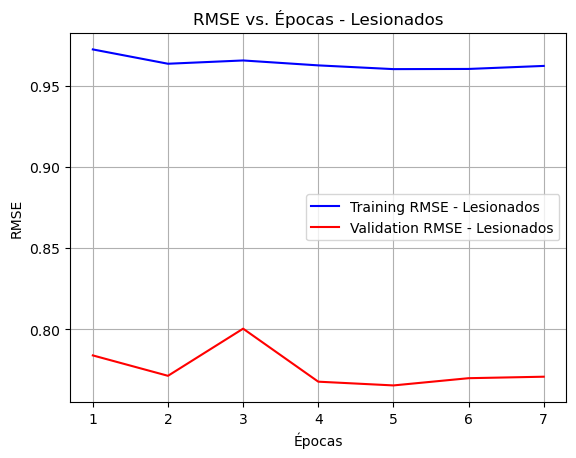

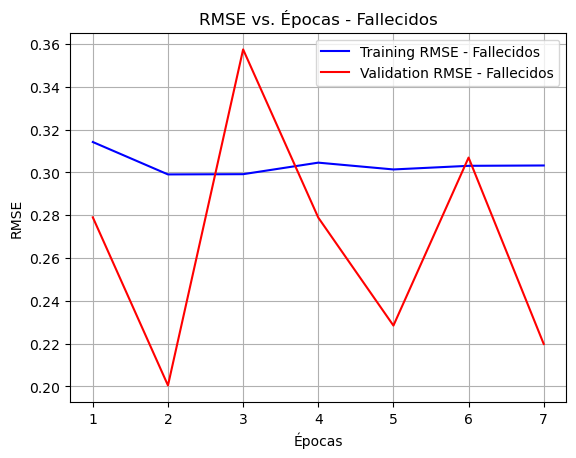

In [31]:
import matplotlib.pyplot as plt

# Assuming you have already trained your regression_model and obtained the history
# history = regression_model.fit(...)

# Extract MSE values
train_mse = history.history['loss']
val_mse = history.history['val_loss']
lesionados_train_rmse = history.history['y_lesionados_root_mean_squared_error']
lesionados_val_rmse = history.history['val_y_lesionados_root_mean_squared_error']
lesionados_val_rmse = history.history['val_y_lesionados_loss']
fallecidos_train_rmse = history.history['y_fallecidos_root_mean_squared_error']
fallecidos_val_rmse = history.history['val_y_fallecidos_root_mean_squared_error']

# Create a line plot
epochs = range(1, len(lesionados_train_rmse) + 1)
plt.plot(epochs, lesionados_train_rmse, 'b', label='Training RMSE - Lesionados')
plt.plot(epochs, lesionados_val_rmse, 'r', label='Validation RMSE - Lesionados')
plt.title('RMSE vs. Épocas - Lesionados')
plt.xlabel('Épocas')
plt.ylabel('RMSE')
plt.legend()
plt.grid()
plt.show()

epochs = range(1, len(lesionados_train_rmse) + 1)
plt.plot(epochs, fallecidos_train_rmse, 'b', label='Training RMSE - Fallecidos')
plt.plot(epochs, fallecidos_val_rmse, 'r', label='Validation RMSE - Fallecidos')
plt.title('RMSE vs. Épocas - Fallecidos')
plt.xlabel('Épocas')
plt.ylabel('RMSE')
plt.legend()
plt.grid()
plt.show()